In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/houses.csv')

In [4]:
df.head()

,Square feet,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
X = df[['Square feet','Bedrooms']].values
Y = df[['Price']].values

In [6]:
print('X =', X[:5])
print('Y =', Y[:5])

X = [[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
Y = [[399900]
 [329900]
 [369000]
 [232000]
 [539900]]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [32]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
scaler_Y = preprocessing.StandardScaler().fit(Y_train)

In [33]:
#the mean of the columns of X_train 
scaler_X.mean_

array([1932.84375,    3.03125])

In [ ]:
#the standard deviation of the columns of X_train 
scaler_X.scale_

array([8.66223308e+02, 7.22814594e-01])

In [ ]:
scaler_Y.mean_

array([342684.3125])

In [ ]:
scaler_Y.scale_

array([130952.0707796])

In [ ]:
# X_scaled = (X - scaler_X.mean_)/scaler_Y.scale_
X_train_scaled = scaler_X.transform(X_train)
Y_train_scaled = scaler_Y.transform(Y_train)

X_test_scaled = scaler_X.transform(X_test)
Y_test_scaled = scaler_Y.transform(Y_test)

In [ ]:
model = Sequential()
model.add(Dense(1))
model.compile(optimizer='SGD',loss='mse')

In [ ]:
model.fit(X_train_scaled,Y_train_scaled,epochs=400,verbose=0)

In [ ]:
J_list = model.history.history['loss']

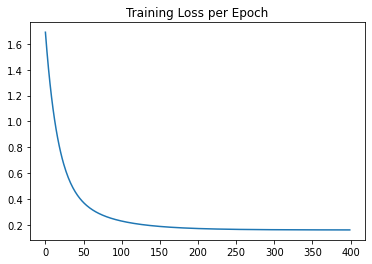

In [ ]:
sns.lineplot(x=range(len(J_list)),y=J_list)
plt.title("Training Loss per Epoch");

In [ ]:
J_train = model.evaluate(X_train_scaled,Y_train_scaled)
J_test = model.evaluate(X_test_scaled,Y_test_scaled)
print(J_train)
print(J_test)

1/1 [==============================] - 0s 74ms/step - loss: 0.4289
0.15978844463825226
0.4289323091506958


In [ ]:
Y_hat_test_scaled = model.predict(X_test_scaled)

In [ ]:
Y_hat_test_scaled[:10]

array([[ 0.5590955 ],
       [ 0.1431176 ],
       [ 0.60223395],
       [-1.296453  ],
       [ 1.0356727 ],
       [-0.7171652 ],
       [ 0.11230443],
       [-0.08489992],
       [-0.46244285],
       [-0.89198923]], dtype=float32)

In [ ]:
Y_test_scaled[:10]

array([[-0.21904436],
       [-0.42522667],
       [ 1.20130737],
       [-1.24308315],
       [ 1.95732443],
       [-0.84522766],
       [ 0.01768347],
       [-0.78414424],
       [ 0.19713844],
       [-0.33359009]])

In [ ]:
Y_hat_test = Y_hat_test_scaled*scaler_Y.scale_+scaler_Y.mean_

In [ ]:
Y_hat_test[:10]

array([[415899.02623733],
       [361425.85945451],
       [421548.09486482],
       [172911.10759747],
       [478307.79258474],
       [248770.04812249],
       [357390.80973797],
       [331566.49252776],
       [282126.46431614],
       [225876.47557309]])

In [ ]:
Y_test[:10]

array([[314000],
       [287000],
       [499998],
       [179900],
       [599000],
       [232000],
       [345000],
       [239999],
       [368500],
       [299000]])